# Practica 3

In [1]:
import numpy as np
import cv2
from skimage import data, io

#Matriz GLCM y sus propiedades
from skimage.feature import greycomatrix, greycoprops

#Clasificador KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Clasificador SVM
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import NuSVC

### Función para dividir imágenes en ventanas y obtener información del GLCM

In [2]:
def Ventanas(img_gray, noVentanas):
    if(noVentanas == 4):
        #Partimos imagen en 4 ventanas
        ventana_4 = np.vsplit(img_gray, 2)
        V1_4 = np.hsplit(ventana_4[0], 2)
        V2_4 = np.hsplit(ventana_4[1], 2)
        array4V = np.array([V1_4[0], V1_4[1], V2_4[0], V2_4[1]])
        return array4V
    if(noVentanas == 8):
        ventana_8 = np.vsplit(img_gray, 2)
        V1_8 = np.hsplit(ventana_8[0], 4) #4 ventanas
        V2_8 = np.hsplit(ventana_8[1], 4) #4 ventanas
        array8V = np.array([V1_8[0], V1_8[1], V1_8[2], V1_8[3], V2_8[0], V2_8[1], V2_8[2], V2_8[3]])
        return array8V
    if(noVentanas == 16):
        ventana_16 = np.vsplit(img_gray, 4)
        V1_16 = np.hsplit(ventana_16[0], 4) 
        V2_16 = np.hsplit(ventana_16[1], 4) 
        V3_16 = np.hsplit(ventana_16[2], 4)
        V4_16 = np.hsplit(ventana_16[3], 4)

        array16V_D64 = np.array([V1_16[0], V1_16[1], V1_16[2], V1_16[3],
                                 V2_16[0], V2_16[1], V2_16[2], V2_16[3],
                                 V3_16[0], V3_16[1], V3_16[2], V3_16[3],
                                 V4_16[0], V4_16[1], V4_16[2], V4_16[3]])
        return array16V_D64
    
    

def getInfoVentana(arrayVentanas, distancia, angulo, info1, info2):
    auxInfo1 = []
    auxInfo2 = []
    for i in range(len(arrayVentanas)):
        glcm = greycomatrix(arrayVentanas[i], distancia, angulo, 256, symmetric=True, normed=True)
        auxInfo1.append(greycoprops(glcm, info1))
        auxInfo2.append(greycoprops(glcm, info2))
        #auxInfo1[i] = greycoprops(glcm, info1)
        #auxInfo2[i] = greycoprops(glcm, info2)
        
        
    return np.asarray(auxInfo1), np.asarray(auxInfo2)


### Requerimientos para la función GLCM

In [3]:
# Requerimientos para la función GLCM
distancia = [1]
#0 -> Oeste a este
#-np.pi/2 -> Sur a norte
angulo = [0] 
informacion = ['energy', 'homogeneity'] 


### Abrimos la imagen D64.bmp
También dividimos la imagen en 4 ventanas

[[0.04064245 0.20115491]
 [0.04226305 0.20021663]
 [0.04147707 0.20544078]
 [0.04524595 0.21278089]]


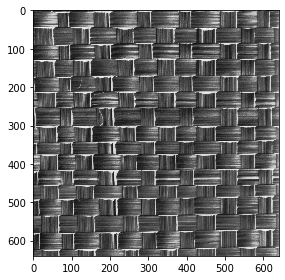

In [81]:
#Abrimos imagen
img = cv2.imread('.\\texturas\\D64.bmp')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
io.imshow(img_gray)

#Dividimos la imágen en 4 ventanas
V4_D64 = Ventanas(img_gray, 4)

# 4 ventanas
energiaV4_D64, homogeneidadV4_D64 = getInfoVentana(V4_D64, distancia, angulo, informacion[0], informacion[1])
energiaV4_D64=energiaV4_D64.flatten()
homogeneidadV4_D64=homogeneidadV4_D64.flatten()
propiedades_D64 = np.zeros((4,2))

for i in range(len(propiedades_D64)):
    propiedades_D64[i][0] = energiaV4_D64[i]
    
for i in range(len(propiedades_D64)):
    propiedades_D64[i][1] = homogeneidadV4_D64[i]

    
#propiedades_D64 = propiedades_D64.reshape(8,1)
print(propiedades_D64)


###  Abrimos la imagen D46.bmp 
También dividimos la imagen en 4 ventanas

[[0.04731724 0.21468055]
 [0.054642   0.22909781]
 [0.05396071 0.21994466]
 [0.05520947 0.23413494]]


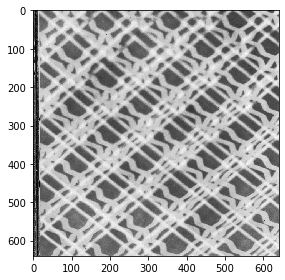

In [82]:
#Abrimos imagen
img = cv2.imread('.\\texturas\\D46.bmp')
img_grayD46 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
io.imshow(img_grayD46)

V4_D46 = Ventanas(img_grayD46, 4)

# 4 ventanas
energiaV4_D46, homogeneidadV4_D46 = getInfoVentana(V4_D46, distancia, angulo, informacion[0], informacion[1])
energiaV4_D46=energiaV4_D46.flatten()
homogeneidadV4_D46=homogeneidadV4_D46.flatten()
propiedades_D46 = np.zeros((4,2))

for i in range(len(propiedades_D46)):
    propiedades_D46[i][0] = energiaV4_D46[i]
    
for i in range(len(propiedades_D46)):
    propiedades_D46[i][1] = homogeneidadV4_D46[i]
        
print(propiedades_D46)

### Abrimos la imagen D101.bmp 
También dividimos la imagen en 4 ventanas

[[0.19333102 0.43043024]
 [0.18791079 0.44659096]
 [0.21853896 0.4484026 ]
 [0.19210657 0.4535458 ]]


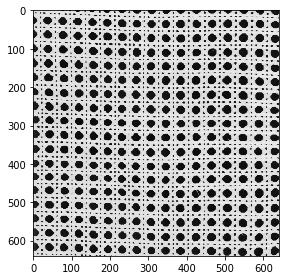

In [83]:
#Abrimos imagen
img = cv2.imread('.\\texturas\\D101.bmp')
img_grayD101 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
io.imshow(img_grayD101)

V4_D101 = Ventanas(img_grayD101, 4)

# 4 ventanas
energiaV4_D101, homogeneidadV4_D101 = getInfoVentana(V4_D101, distancia, angulo, informacion[0], informacion[1])
energiaV4_D101=energiaV4_D101.flatten()
homogeneidadV4_D101=homogeneidadV4_D101.flatten()
propiedades_D101 = np.zeros((4,2))

for i in range(len(propiedades_D101)):
    propiedades_D101[i][0] = energiaV4_D101[i]
    
for i in range(len(propiedades_D101)):
    propiedades_D101[i][1] = homogeneidadV4_D101[i]
        
print(propiedades_D101)

### Abrimos la imagen D49.bmp
También dividimos la imagen en 4 ventanas

[[0.10302213 0.45005878]
 [0.09095318 0.44567723]
 [0.10567847 0.44552102]
 [0.09490792 0.43086581]]


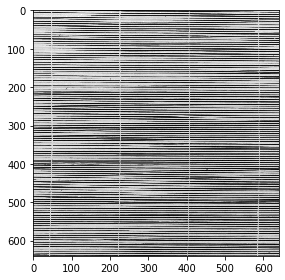

In [84]:
#Abrimos imagen
img = cv2.imread('.\\texturas\\D49.bmp')
img_grayD49 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
io.imshow(img_grayD49)

V4_D49 = Ventanas(img_grayD49, 4)

# 4 ventanas
energiaV4_D49, homogeneidadV4_D49 = getInfoVentana(V4_D49, distancia, angulo, informacion[0], informacion[1])
energiaV4_D49=energiaV4_D49.flatten()
homogeneidadV4_D49=homogeneidadV4_D49.flatten()
propiedades_D49 = np.zeros((4,2))

for i in range(len(propiedades_D49)):
    propiedades_D49[i][0] = energiaV4_D49[i]
    
for i in range(len(propiedades_D49)):
    propiedades_D49[i][1] = homogeneidadV4_D49[i]
        
print(propiedades_D49)

In [75]:
aux_X = [] 
aux_X.append([ propiedades_D64[:3,:], propiedades_D46[:3,:], propiedades_D101[:3,:],  propiedades_D49[:3,:] ])
X = np.asarray(aux_X).reshape(4,3,2)
print(X.shape)
print(X)

(4, 3, 2)
[[[0.04064245 0.20115491]
  [0.04226305 0.20021663]
  [0.04147707 0.20544078]]

 [[0.04731724 0.21468055]
  [0.054642   0.22909781]
  [0.05396071 0.21994466]]

 [[0.19333102 0.43043024]
  [0.18791079 0.44659096]
  [0.21853896 0.4484026 ]]

 [[0.10302213 0.45005878]
  [0.09095318 0.44567723]
  [0.10567847 0.44552102]]]


In [76]:
aux_Y = []
aux_Y.append([propiedades_D64[3,:], propiedades_D46[3,:], propiedades_D101[3,:], propiedades_D49[3,:]])

Y = np.asarray(aux_Y).reshape(4,2)
print(Y)
print(Y.shape)

[[0.04524595 0.21278089]
 [0.05520947 0.23413494]
 [0.19210657 0.4535458 ]
 [0.09490792 0.43086581]]
(4, 2)


### Clasificador KNN

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)
print(X_train)
print(y_train)


[[[0.04731724 0.21468055]
  [0.054642   0.22909781]
  [0.05396071 0.21994466]]

 [[0.10302213 0.45005878]
  [0.09095318 0.44567723]
  [0.10567847 0.44552102]]

 [[0.04064245 0.20115491]
  [0.04226305 0.20021663]
  [0.04147707 0.20544078]]]
[[0.05520947 0.23413494]
 [0.09490792 0.43086581]
 [0.04524595 0.21278089]]


In [80]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [80]:
pred = neigh.predict(X_test)
print('accuracy score %0.3f' % neigh.score(X_test, y_test))

accuracy score 0.000


In [350]:
print("Predicción")
print(neigh.predict(X_test))
print("Real")
print(y_test)
print("Precisión del clasificador en el set de entrenamiento", neigh.score(X_test, y_test))

Predicción
[3 2 2 0 3 0 0 0 0 0]
Real
[3, 2, 2, 0, 3, 1, 1, 0, 1, 0]
Precisión del clasificador en el set de entrenamiento 0.7


In [179]:
X_8 = np.array([V8_D64[0].ravel(), V8_D64[1].ravel(), V8_D64[2].ravel(), V8_D64[3].ravel()])
Y_8 = np.array([V8_D64[4].ravel(), V8_D64[5].ravel(), V8_D64[6].ravel(), V8_D64[7].ravel()])

### Clasificador SVM
Vamos a realizar el entrenamiento con las ventanas
* X son los datos de entrenamiento y Y son los datos de prueba
El vector y para la función fit() debe ser igual al numero de elementos del vector X

In [353]:
clf=SVC(kernel='linear')
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [356]:
print("Predicción")
print(clf.predict(X_test))
print("Real")
print(y_test)
print("Precisión del clasificador en el set de entrenamiento", clf.score(X_test, y_test))

Predicción
[2 2 2 3 3 3 3 3 3 3]
Real
[3, 2, 2, 0, 3, 1, 1, 0, 1, 0]
Precisión del clasificador en el set de entrenamiento 0.3


### PRUEBAS

In [34]:
image1 = np.array ([[4, 3, 3, 3, 1],
                   [4, 2, 2, 0, 1],
                   [4, 0, 0, 1, 1],
                   [0, 4, 4, 2, 2]], dtype=np.uint8)

In [51]:
result = greycomatrix(image1, [1], [0] ,levels=5)
print(result.shape)
#print(result.ravel().reshape((5,5)))
#result[:, :, 0, 0]

(5, 5, 1, 1)


In [42]:
#Obtenemos propiedades
#properties = ['energy', 'homogeneity']

feats = np.hstack([greycoprops(result, prop).ravel() for prop in properties])
print(feats)

NameError: name 'properties' is not defined

In [ ]:
#GLCM de sur a norte normalizada
result = greycomatrix(image1, [1], [-np.pi/2],levels=5)
result[:, :, 0, 0]

https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.greycomatrix

https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/